Project root added to sys.path: d:\Handwritten Digit Recognition


d:\Handwritten Digit Recognition\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



 Test Accuracy: 0.9264
⏱ Training time: 11.90 sec
⏱ Prediction time: 0.02 sec

 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



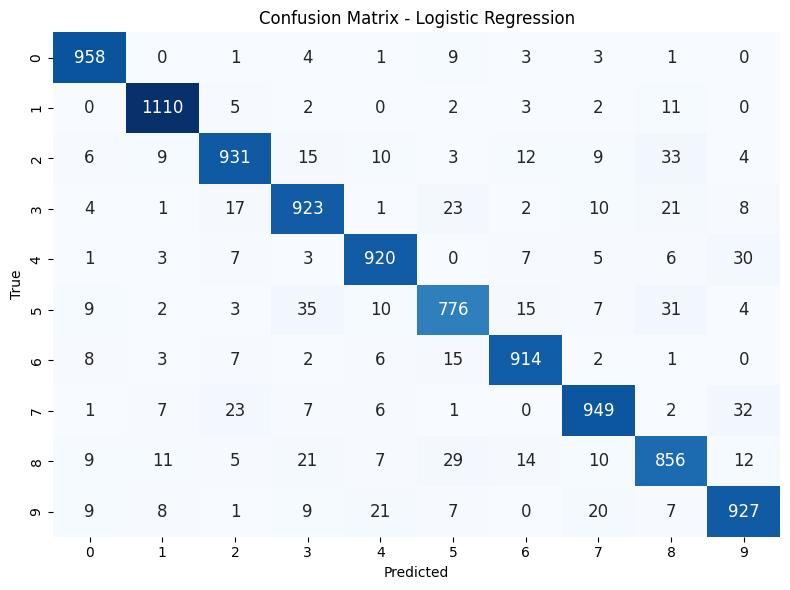

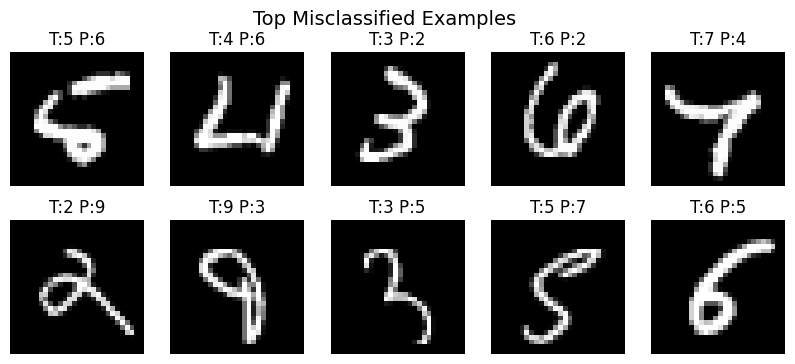

In [13]:
%run ../utils/init_notebook.py

from utils.data_loader import load_mnist
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
X_train, y_train, X_test, y_test = load_mnist(normalise=True)

# Flatten images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# PCA to reduce dimensionality
pca = PCA(n_components=700)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', random_state=42)
start_train = time.time()
model.fit(X_train_pca, y_train)
end_train = time.time()

# Predict
start_pred = time.time()
y_pred = model.predict(X_test_pca)
end_pred = time.time()

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\n Test Accuracy: {acc:.4f}")
print(f"⏱ Training time: {end_train - start_train:.2f} sec")
print(f"⏱ Prediction time: {end_pred - start_pred:.2f} sec")

# Classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 12})
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

# Show misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]
plt.figure(figsize=(10, 4))
for i, idx in enumerate(misclassified_idx[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"T:{y_test[idx]} P:{y_pred[idx]}")
    plt.axis('off')
plt.suptitle("Top Misclassified Examples", fontsize=14)
plt.show()